<a href="https://colab.research.google.com/github/sami10644/Google-Stock-Price-Prediction-/blob/main/rnn(stock).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)


In [ ]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [ ]:
X_train = np.reshape(X_train,(1257,1,1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 4, activation='sigmoid',input_shape = (None,1)))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train,batch_size  = 32 ,epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1618
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1131
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0967
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 13/200
40/40 [=================

In [ ]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values


In [ ]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs,(20,1,1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

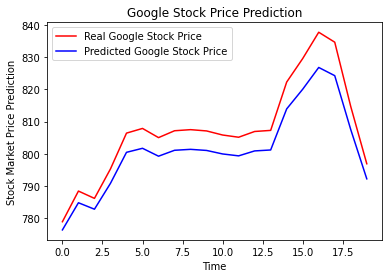

In [ ]:
plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Market Price Prediction')
plt.legend()
plt.show()